# Lululemon: Men's Running Clothing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import re
import nltk

In [20]:
df = pd.read_csv('cleaned_mensrunning_lululemon.csv')
pd.options.display.max_colwidth = 100

In [21]:
df.shape

(2418, 23)

In [22]:
df.head()

,product,productCategory,productCategoryDetail,price,averageRating,username,userRating,userLocation,athleteType,ageRange,...,fit,reviewTitle,reviewDate,reviewText,responseDate,responseText,Helpful,NotHelpful,reviewLength,response
0,Metal Vent Tech Short Sleeve,Tops,Short Sleeves,68.0,2.9,NYR26,5.0,"STAMFORD, CT",SWEATY GENERALIST,18-24,...,NaN,The best tshirt,2018-10-12,These are the most comfortable T-shirts. Wish you guys would make more colors and bring back the...,NaN,NaN,0,0,150,0
1,Metal Vent Tech Short Sleeve,Tops,Short Sleeves,68.0,2.9,MJB23,1.0,"CHICAGO, IL, USA",SWEATY GENERALIST,18-24,...,NaN,Very Poor Quality,2018-10-11,I purchased this Short Sleeve expecting it to be just like all the other ones I have in my colle...,2018-10-11,"Dear mjb23,\n\nThanks for reaching out and providing this feedback for us. We hear where you're ...",0,0,567,1
2,Metal Vent Tech Short Sleeve,Tops,Short Sleeves,68.0,2.9,JKD123,1.0,"CHICAGO, IL, USA",RUNNER,25-34,...,NaN,Stretches When You Sweat,2018-10-08,I bought this shirt for my husband to run the Chicago Marathon. Upon starting the race it fit gr...,2018-10-09,"Hi Jkd123,\n\nThanks for reaching out and providing this feedback for us. I completely understan...",0,0,269,1
3,Metal Vent Tech Short Sleeve,Tops,Short Sleeves,68.0,2.9,SLASH,5.0,"OVERLAND PARK, KS, USA",SWEATY GENERALIST,45-54,...,NaN,Love Lulu,2018-10-08,I have several shirts and shorts I have purchased from Lululemon. Hands down the best clothing I...,NaN,NaN,0,0,170,0
4,Metal Vent Tech Short Sleeve,Tops,Short Sleeves,68.0,2.9,BRANDONM19,4.0,"HUTCHINSON, KS",SWEATY GENERALIST,18-24,...,NaN,Sweat wicking shirt,2018-10-03,Great for workouts.,NaN,NaN,0,0,19,0


# Category/Category Types Analysis

### How are ratings spread over category types?

In [23]:
catType = df.groupby('productCategoryDetail')['product'].count().reset_index().sort_values('product', ascending = False).reset_index(drop=True)
catType = catType.rename(columns={'productCategoryDetail':'Category Detail', 'product':'Total Reviews'})

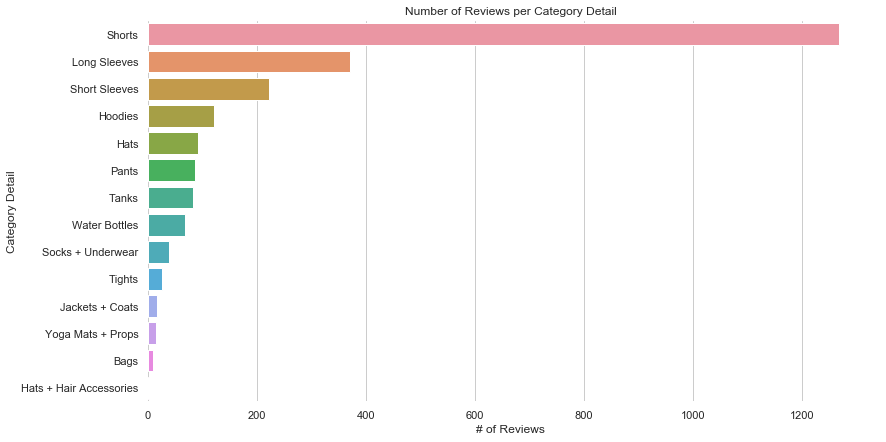

In [24]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total reviews per category type
sns.set_color_codes("pastel")
sns.barplot(x = 'Total Reviews', y='Category Detail', data=catType)

# Add an informative axis label
ax.set(ylabel="Category Detail", title='Number of Reviews per Category Detail',
       xlabel="# of Reviews")
sns.despine(left=True, bottom=True)
# plt.savefig('output.png', dpi=300)

## Category Types and Average Rating

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


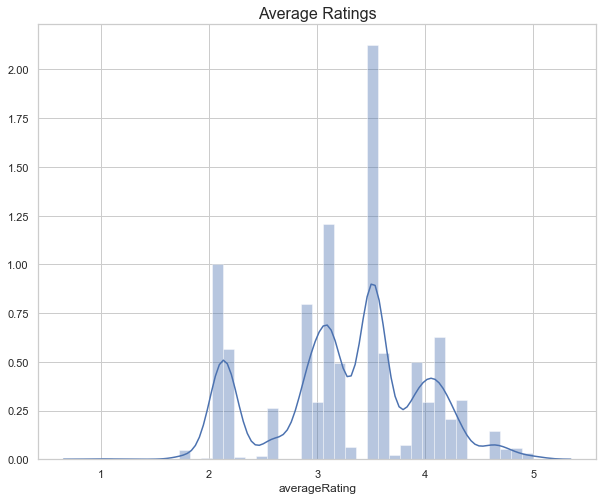

In [35]:
plt.figure(figsize=(10,8))
sns.distplot(df['averageRating'])
plt.title("Average Ratings", fontsize=16)
plt.show();

### What is the max number of ratings people gave?

In [111]:
cnt_srs = df['userRating'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Ratings Distribution',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Ratings")

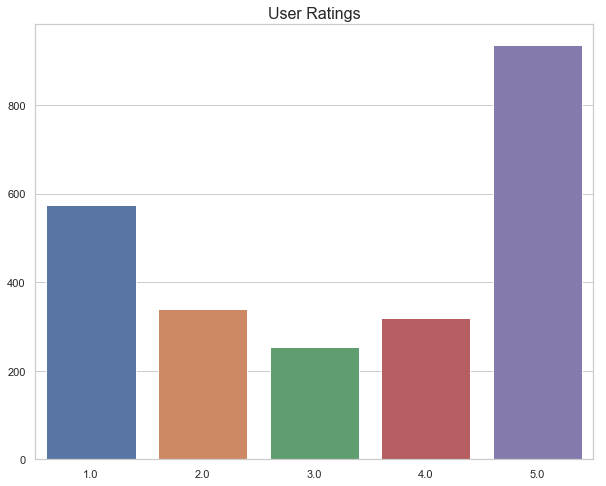

In [34]:
userRatingsCounts = df['userRating'].value_counts()

plt.figure(figsize=(10,8))
sns.barplot(x=userRatingsCounts.index[::-1], y=userRatingsCounts.values[::-1])
plt.title("User Ratings", fontsize=16)
plt.show();

## Number of Responses by User Rating

In [47]:
response_user_rating = df.groupby('userRating')['response'].sum().reset_index(name='Total Responses')
response_user_rating = response_user_rating.rename(columns={'userRating':'User Rating'})
response_user_rating

,User Rating,Total Responses
0,1.0,437
1,2.0,234
2,3.0,146
3,4.0,66
4,5.0,13


## The most amount of responses come from ratings of 1-3; 4's and 5's get the lowest amount of responses.

### What is going with these 13 5's that get responses?

In [49]:
fives = df[ (df['userRating'] == 5.0) & (df['response'] == 1) ]
fives.head()

,product,productCategory,productCategoryDetail,price,averageRating,username,userRating,userLocation,athleteType,ageRange,...,fit,reviewTitle,reviewDate,reviewText,responseDate,responseText,Helpful,NotHelpful,reviewLength,response
140,"Pace Breaker Short\n9"" Updated",Bottoms,Shorts,68.0,2.1,ANDY123,5.0,OTTAWA,CYCLIST,55-65,...,NaN,Great shorts so far,2018-07-09,"I love this upgrade. The liner is very comfortable and supports well. However, I am not convince...",2018-07-21,"Hey BringBack,\n\nThank you for taking the time to share your feedback with us. It’s a bummer to...",1,1,419,1
357,"Pace Breaker Short\nLinerless 9"" Updated",Bottoms,Shorts,68.0,4.1,HOCKEYPLAYER9,5.0,"PHILADELPHIA, PA, USA",SWEATY GENERALIST,18-24,...,just right,A Good Four Years,2017-04-13,These shorts are fantastic!! I've been wearing the same five or six pairs to the gym and casuall...,2017-04-13,"Hey hockeyplayer9,\nThanks for taking the time to share your thoughts with us today. We love tha...",0,0,667,1
471,Lightspeed Run Hat,Accessories,Hats,38.0,4.3,KRF110,5.0,NaN,NaN,NaN,...,NaN,Light speed Hat,2016-07-21,The hat is incredibly light and the strap is amazing. I own a black one with no design and its p...,2016-07-21,"Hey krf110,\nThanks for taking the time to share your feedback about your Light-speed Run Hat. W...",8,0,280,1
1045,"Pace Breaker Short\n9""",Bottoms,Shorts,68.0,3.5,JEARBEAR,5.0,"KANSAS CITY, MO",SWEATY GENERALIST,35-44,...,just right,"Great fit, Deteriorates over time",2016-08-26,"I now have 3 pairs of pace breakers, having bought my 3rd pair last month. Having owned the firs...",2016-08-26,"Hey JearBear,\nThanks for taking the time to share your feedback about your Pace Breaker Short 9...",0,0,464,1
1067,"Pace Breaker Short\n9""",Bottoms,Shorts,68.0,3.5,KOUKLA,5.0,"AJAX, ON, CANADA",NaN,25-34,...,NaN,Best Shorts!,2016-06-09,"Mu husband owns about 3 pairs of these shorts and they are just perfect. They are super comfy, t...",2016-06-09,"Hi Koukla,\nOh dear. Thanks for taking the time to share this feedback with us about the liner- ...",0,0,311,1


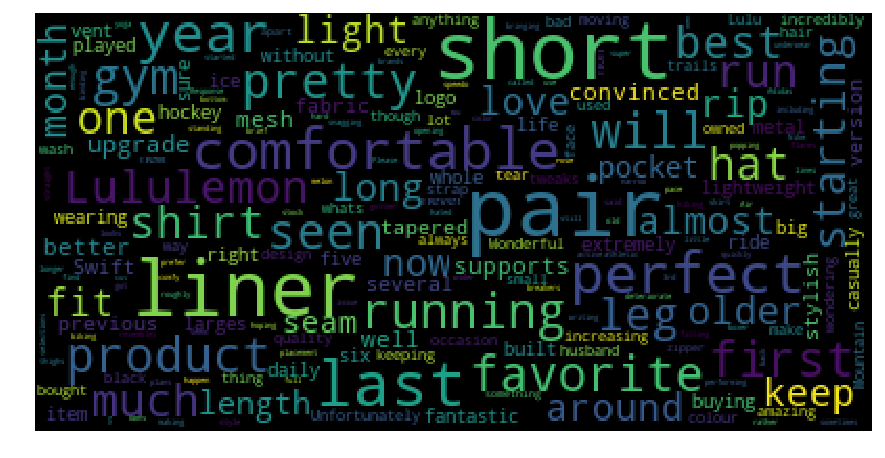

In [263]:
wc(fives['reviewText'])

## Are these 5's that get a response much different from the rest of the reviews?

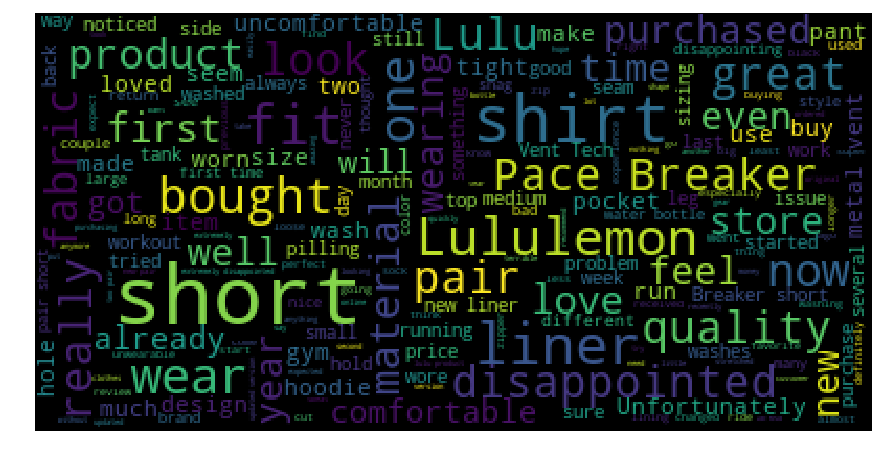

In [264]:
onesTwos = df[ (df['userRating'] == 1.0) | (df['userRating'] == 2.0) ]
onesTwos = onesTwos[ onesTwos['response'] == 1 ]
wc(onesTwos['reviewText'])

### Number of Ratings by Athletic Type

In [61]:
bodyTypeCounts = df.groupby('bodyType')['product'].count().reset_index(name='Total Reviews').sort_values('Total Reviews', ascending=False)
bodyTypeCounts.rename(columns={'bodyType':'Body Type'}, inplace=True)
bodyTypeCounts

,Body Type,Total Reviews
0,ATHLETIC,1162
3,MUSCULAR,336
2,LEAN,214
5,SLIM,121
6,SOLID,92
1,CURVY,46
4,PETITE,34


# Curvey and Petite Reviews

In [65]:
df[ df['bodyType'] == 'CURVY' ].groupby('athleteType')['product'].count().reset_index(name='Total Reviews').sort_values('Total Reviews', ascending = False)

,athleteType,Total Reviews
3,SWEATY GENERALIST,26
4,YOGI,9
2,RUNNER,7
0,CYCLIST,3
1,DANCER,1


In [71]:
df [df['bodyType'] == 'CURVY' ].groupby('product').size().reset_index(name='Total Reviews').sort_values('Total Reviews', ascending=False)

,product,Total Reviews
11,Purist Cycling Water Bottle\n26 oz,10
7,"Pace Breaker Short\n9"" Updated",6
6,"Pace Breaker Short\n9""",5
8,"Pace Breaker Short\nLinerless 9"" Updated",3
13,"Surge Jogger\n29""",3
10,"Pace Breaker Short 9""\nLinerless",3
16,"T.H.E. Short\n9"" Updated",2
5,Metal Vent Tech Short Sleeve,2
4,Metal Vent Tech Headband,2
3,Lightspeed Run Hat,2


In [73]:
df[ df['bodyType'] == 'ATHLETIC' ].groupby('athleteType').size().reset_index(name='Total Reviews').sort_values('Total Reviews', ascending = False)

,athleteType,Total Reviews
3,SWEATY GENERALIST,638
2,RUNNER,362
4,YOGI,68
0,CYCLIST,29
1,DANCER,7


In [74]:
df[ df['bodyType'] == 'ATHLETIC' ].sample(10)

,product,productCategory,productCategoryDetail,price,averageRating,username,userRating,userLocation,athleteType,ageRange,...,fit,reviewTitle,reviewDate,reviewText,responseDate,responseText,Helpful,NotHelpful,reviewLength,response
1411,Metal Vent Tech Hoodie,Tops,Long Sleeves,98.0,2.2,CHICAGOGUY,2.0,CHICAGO,RUNNER,35-44,...,NaN,"Great Fit, Great Colour BUT Poor Quality Fabric",2017-10-29,"With only 2 days wearing this black/white, the fabric started pilling. The store was happy to ta...",NaN,NaN,0,0,432,0
2219,"Surge Short\n4"" Updated",Bottoms,Shorts,68.0,3.9,MRJ100,2.0,UNITED STATES,SWEATY GENERALIST,25-34,...,tight,Horrible Update to a Great Short,2018-09-04,The updated boxer-style liner in the Surge Short is awful. Clearly these were not designed for s...,2018-09-04,"Dear MRJ100,\n\nThanks for taking the time to share your thoughts on Surge Short 4"" *Updated. I ...",4,0,486,1
1042,"Pace Breaker Short\n9""",Bottoms,Shorts,68.0,3.5,TYSON,2.0,NaN,NaN,25-34,...,NaN,Comfortable at first...,2016-09-08,When I first tried these shorts on they fit great and were comfortable. After a few wears I noti...,2016-09-09,"Hey Tyson,\nWe hear where you're coming from and have sent an email your way so we can follow up...",0,0,435,1
162,"Pace Breaker Short\n9"" Updated",Bottoms,Shorts,68.0,2.1,WOODSTOCK1976,5.0,"CALEDON, ON, CANADA",SWEATY GENERALIST,35-44,...,NaN,vast improvement,2018-05-10,"The staff at lululemon at Sherway Gardens in Etobicoke, Ontario were extremely helpful in guidin...",NaN,NaN,1,7,334,0
1011,"Pace Breaker Short\n9""",Bottoms,Shorts,68.0,3.5,POOKIEBEAR,4.0,"BALTIMORE, MD, USA",SWEATY GENERALIST,25-34,...,NaN,Awesome All Around Shorts,2017-03-31,I love to wear these shorts over the Surge tights. They are short enough to move around unencumb...,2017-03-31,"Hey Pookiebear,\nThanks for taking the time to get in touch about your Pace Breaker Short 9"". An...",1,0,342,1
1837,"Pace Breaker Short\n9"" Updated",Bottoms,Shorts,68.0,2.1,AZNMIKE,5.0,"ATLANTA, GA, USA",SWEATY GENERALIST,25-34,...,NaN,My favorite pair yet,2018-08-21,"These are the updated version, and they definitely improved the fit and functionality of the sho...",NaN,NaN,0,2,116,0
2155,Lightspeed Run Hat,Accessories,Hats,38.0,4.3,BARREASH,4.0,"AUBURN, AL, USA",SWEATY GENERALIST,25-34,...,NaN,Favorite Lulu Hat,2016-06-04,Even though I am a female I love this hat. I own two in black and would order it again in black ...,NaN,NaN,3,1,354,0
1104,"Pace Breaker Short\n9""",Bottoms,Shorts,68.0,3.5,TURFIE,5.0,"HAMILTON, ON, CANADA",RUNNER,25-34,...,NaN,Best Running Short?,2015-10-31,Always wore Core Shorts with some sort of compression short underneath. This year tried these an...,NaN,NaN,1,0,162,0
2169,Metal Vent Tech Surge Long Sleeve,Tops,Long Sleeves,88.0,3.9,JMF00,5.0,NaN,SWEATY GENERALIST,18-24,...,NaN,Top Notch Comfort,2018-03-02,"This product is so comfortable. I wear it on runs, to the gym, for yoga, etc... It is so lightwe...",NaN,NaN,1,0,198,0
845,Surge Warm Full Zip,Tops,Hoodies,118.0,3.6,BRAY11,2.0,"WEST VANCOUVER, BC, CANADA",RUNNER,18-24,...,NaN,Beautiful but beware of Zipper,2017-12-03,as a owner of half a dozen of the half-zip versions of this i jumped all over the opportunity to...,2017-12-03,"Hi Bray11,\nI'm sorry to hear your zipper is giving you troubles. We stand by the quality of our...",6,1,329,1


## Repeat Buyers Analysis

In [113]:
users = df.groupby('username')
top_users = df.groupby('username').size().reset_index(name='Total Reviews').sort_values('Total Reviews', ascending=False)
top_20 = top_users.head(20)
top_20

,username,Total Reviews
531,FITNAVYGUY,10
84,ANONYMOUS,9
1344,RUN970,7
930,LIGHTNINGPIG,6
386,DAN3,5
1574,THEMAN,5
437,DILLIPE,5
142,BATTLE8585,5
496,ENDRESS93,4
1109,MPOLLZZIE,4


### New DF containing only top 20 users

In [94]:
df_top20 = df.iloc[top_20.index.tolist()]
df_top20.sort_values('reviewLength', ascending=False).head()

,product,productCategory,productCategoryDetail,price,averageRating,username,userRating,userLocation,athleteType,ageRange,...,fit,reviewTitle,reviewDate,reviewText,responseDate,responseText,Helpful,NotHelpful,reviewLength,response
1564,"Surge Short\n7""",Bottoms,Shorts,68.0,3.2,MIKEN543,2.0,NaN,NaN,NaN,...,just right,Surge Shorts Fall Short of Expectations,2015-08-21,"A couple of months back, I purchased two pairs of Surge Shorts. I was so happy to find a well-fi...",2015-08-22,"Hi Miken543,\nThanks for taking the time to reach out to us. We're sorry to hear you are experie...",10,1,967,1
84,"Pace Breaker Short\n9"" Updated",Bottoms,Shorts,68.0,2.1,LULUFANFLORIDA,1.0,FLORIDA,NaN,35-44,...,NaN,Pace Breaker Shorts Updated,2018-08-31,I am a huge fan of the pace breaker short with liner. They are the only workout short I have wor...,2018-08-31,"Dear LuluFanFlorida,\n\nWe appreciate your feedback regarding the Pace Breaker Short 9"" *Updated...",2,0,733,1
437,"Surge Jogger\n29""",Bottoms,Pants,118.0,3.1,NICTIED,1.0,"LONDON, ONTATIO",SWEATY GENERALIST,18-24,...,NaN,Horrible Quality,2017-11-09,I bought these pants for my boyfriend almost a week ago and he absolutely loved them... but afte...,2017-11-09,"Hey NicTied,\nThanks so much for sharing your thoughts today. We stand behind the quality of our...",6,1,698,1
318,"Pace Breaker Short\nLinerless 9"" Updated",Bottoms,Shorts,68.0,4.1,EZRA,5.0,SAINT LOUIS MO,SWEATY GENERALIST,25-34,...,NaN,Essential,2018-08-18,I currently work overseas in austere environments. I’m either wearing tactical cargo pants or th...,NaN,NaN,1,0,533,0
142,"Pace Breaker Short\n9"" Updated",Bottoms,Shorts,68.0,2.1,SDDETZLER,1.0,"CHICAGO, IL, USA",NaN,NaN,...,NaN,DON’T BUY,2018-07-08,My hubby is a devoted pacebreaker user. Until the “updated” version came out! The liner is like ...,NaN,NaN,1,0,525,0


In [99]:
catType_top20 = df_top20.groupby('productCategoryDetail').size().reset_index(name='Total Reviews').sort_values('Total Reviews', ascending=False)
catType_top20 = catType_top20.rename(columns={'productCategoryDetail':'Product Category Detail'})

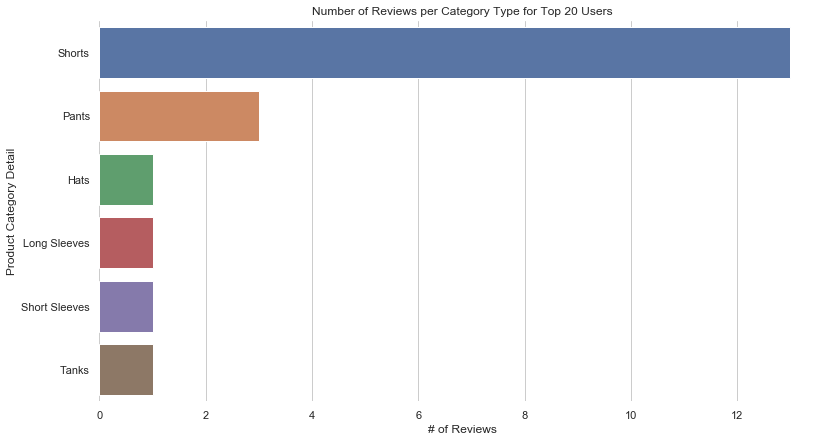

In [100]:
## sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total reviews per category type
sns.set_color_codes("pastel")
sns.barplot(x = 'Total Reviews', y='Product Category Detail', data=catType_top20)

# Add an informative axis label
ax.set(title='Number of Reviews per Category Type for Top 20 Users',
       xlabel="# of Reviews")
sns.despine(left=True, bottom=True)

### How much of sales do they make up?

In [106]:
df_top20_sales=df_top20.groupby('username')['price']
df_top20_sales

username
AVIDRUNNERINKS    1
BOBUDDY           1
BRIGUYZINGTON     1
EZRA              1
GENE              1
JAVI              1
JMAN0000010       1
LCS1990           1
LULUFANFLORIDA    1
MADACO            1
MICHIGANLULU31    1
MIKEN543          1
NICKATL           1
NICTIED           1
PLUMBER           1
ROVERSCHWEIZ      1
RUNNER121         1
SDDETZLER         1
TIMMY80           1
YOGALJ            1
Name: price, dtype: int64

In [430]:
df_prod_sales=df.groupby('product')['list_price'].agg(['sum']).sort_values('sum', ascending=False)
df_prod_sales

,sum
product,
Metal Vent Tech Short Sleeve,17408
Metal Vent Tech Long Sleeve,11076
"Pace Breaker Short 9""",10676
Surge Warm 1/2 Zip,8208
Metal Vent Tech Hoodie,7840
"Surge Jogger 29""",6018
"Pace Breaker Short 9"" Updated",5848
"Surge Short 7""",5100
Metal Vent Tech Long Sleeve Henley,4840


# Age Range Analysis

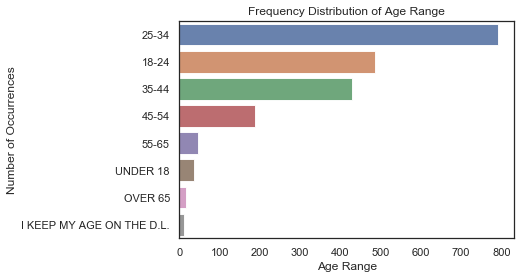

In [115]:
age_count = df['ageRange'].value_counts()
sns.set(style="white")
sns.set_color_codes("pastel")


sns.barplot(y = age_count.index, x = age_count.values, alpha=0.9)

plt.title('Frequency Distribution of Age Range')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Age Range', fontsize=12);

# Review Text Analysis

### Create a new data frame with empty reviews removed

In [117]:
df_reviews = df.dropna(subset=['reviewText'])

In [119]:
df_reviews['reviewText'].isnull().sum()

0

In [123]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

## How are users talking about the products?

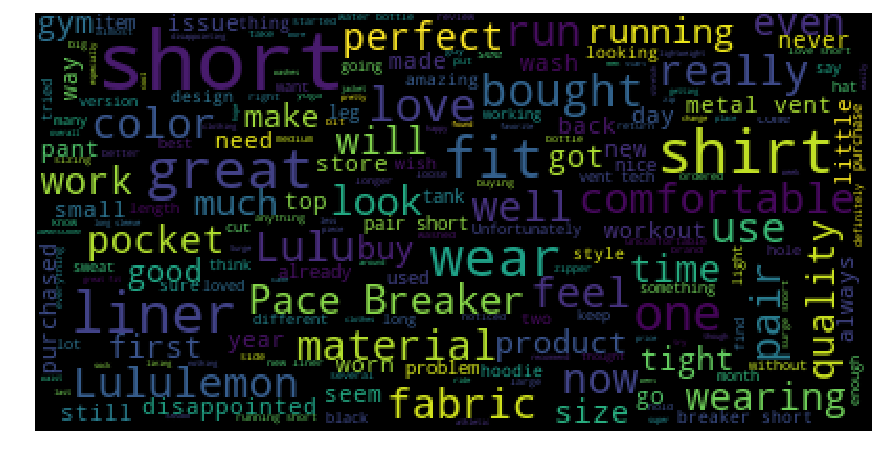

In [262]:
wc(df_reviews['reviewText'])

### Does the length of a review tell anything about the ratings given?

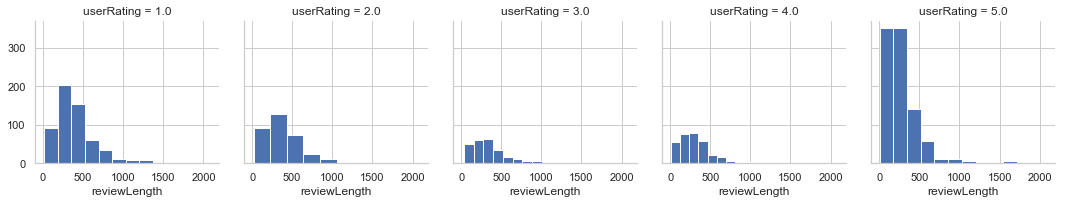

In [245]:
g = sns.FacetGrid(data=df_reviews, col='userRating')
g.map(plt.hist, 'reviewLength');

Seems that ratings follow a similar distribution in review length.
There also seems to be a lower amount of 3 and 4 ratings
Mostly ratings of 5

## How are ratings spread through cateogry types?

In [133]:
df.groupby('product')['userRating'].agg(['mean', 'count']).sort_values('count', ascending = False).head(20)

,mean,count
product,,
"Pace Breaker Short\n9""",3.511521,434
"Pace Breaker Short\n9"" Updated",2.120968,248
Metal Vent Tech Hoodie,2.244444,135
Metal Vent Tech Long Sleeve,3.308411,107
Surge Warm 1/2 Zip,3.098039,102
"Surge Jogger\n29""",3.074074,81
Metal Vent Tech Short Sleeve,3.525000,80
Metal Vent Tech Tank,3.037500,80
"Surge Short\n7""",3.230769,78


# Does month/year make an impact on ratings?

In [136]:
from datetime import datetime

In [138]:
df['reviewDate'] = pd.to_datetime(df['reviewDate'], infer_datetime_format=True)
df['responseDate'] = pd.to_datetime(df['responseDate'], infer_datetime_format=True)

In [139]:
df['reviewYear'], df['reviewMonth'] = df['reviewDate'].dt.year, df['reviewDate'].dt.month

In [143]:
year_counts = df.groupby('reviewYear')['product'].count().reset_index()
year_counts = year_counts.rename(columns={'reviewYear':'Year', 'product':'Total Reviews'})
year_counts

,Year,Total Reviews
0,2009,3
1,2010,36
2,2011,35
3,2012,61
4,2013,60
5,2014,107
6,2015,190
7,2016,270
8,2017,366
9,2018,1290


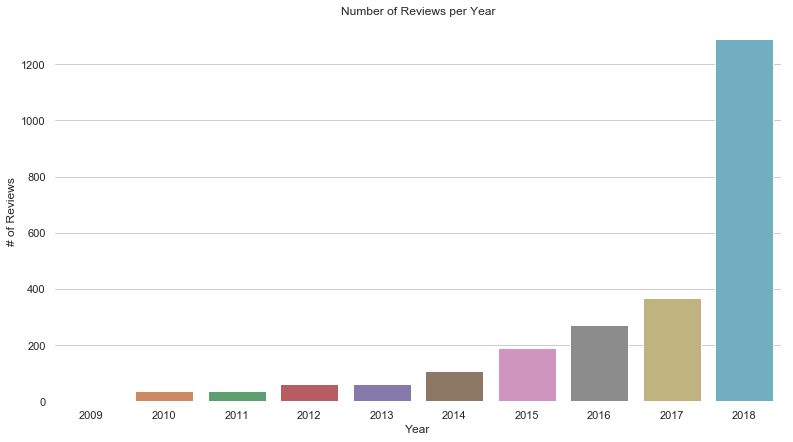

In [144]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total reviews per category type
sns.set_color_codes("pastel")
sns.barplot(x = 'Year', y='Total Reviews', data=year_counts)

# Add an informative axis label
ax.set(ylabel="# of Reviews", title='Number of Reviews per Year',
       xlabel="Year")
sns.despine(left=True, bottom=True)

In [147]:
month_counts = df.groupby('reviewMonth')['product'].count().reset_index()
month_counts = month_counts.rename(columns={'product':'Total Reviews'})

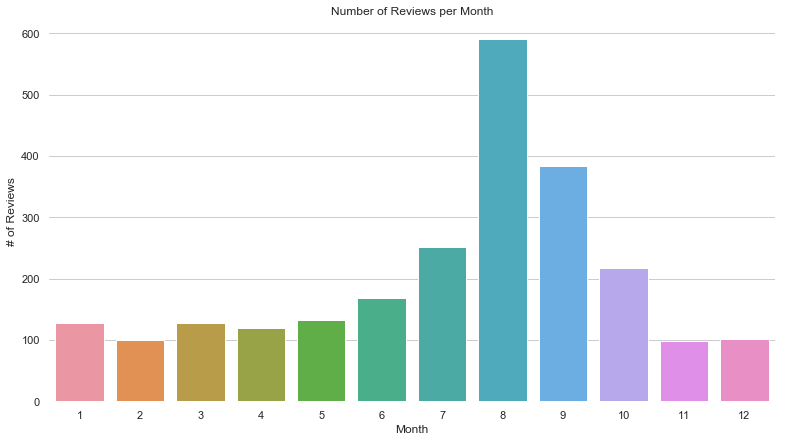

In [148]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total reviews per category type
sns.set_color_codes("pastel")
sns.barplot(x = 'reviewMonth', y='Total Reviews', data=month_counts)

# Add an informative axis label
ax.set(ylabel="# of Reviews", title='Number of Reviews per Month',
       xlabel="Month")
sns.despine(left=True, bottom=True)

# NLP Analysis on Reviews
- clean
- stem
- filter stop words
- tokenize

In [150]:
def cleaned(x):
    return re.sub(r'[^a-zA-Z ]', '',x)
df_reviews['cleanReviewText'] = df_reviews['reviewText'].apply(cleaned)

In [151]:
df_reviews['cleanReviewText'] = df_reviews['cleanReviewText'].str.lower()

In [152]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [155]:
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

def wordfilter(string, filtwords):
    filtered = []
    tokens = word_tokenize(string)
    for word in tokens:
        if word not in filtwords:
            filtered.append(stemmer.stem(word))
    return filtered

In [156]:
df_reviews['cleanReviewText'] = [wordfilter(x, stop_words) for x in df_reviews['cleanReviewText']]

## Sentiment Analysis

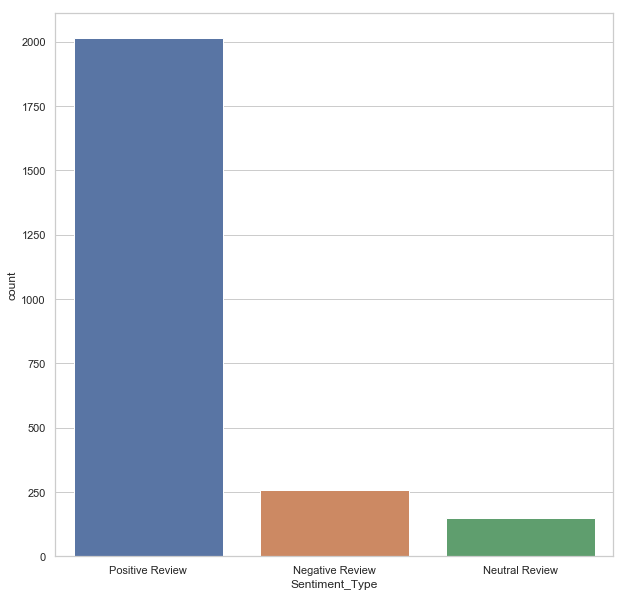

In [217]:
bloblist_desc = list()

df_reviews_str=df_reviews['cleanReviewText'].astype(str)
for row in df_reviews_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])
    
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

In [292]:
df_reviews = pd.concat([df_reviews, df_polarity_desc], axis=1)
df_reviews.head()

,product,productCategory,productCategoryDetail,price,averageRating,username,userRating,userLocation,athleteType,ageRange,...,responseText,Helpful,NotHelpful,reviewLength,response,cleanReviewText,Review,sentiment,polarity,Sentiment_Type
0,Metal Vent Tech Short Sleeve,Tops,Short Sleeves,68.0,2.9,NYR26,5.0,"STAMFORD, CT",SWEATY GENERALIST,18-24,...,NaN,0,0,150,0,"[comfort, tshirt, wish, guy, would, make, color, bring, back, old, style, stitch, differ, color]","['comfort', 'tshirt', 'wish', 'guy', 'would', 'make', 'color', 'bring', 'back', 'old', 'style', ...",0.050000,0.10000,Positive Review
1,Metal Vent Tech Short Sleeve,Tops,Short Sleeves,68.0,2.9,MJB23,1.0,"CHICAGO, IL, USA",SWEATY GENERALIST,18-24,...,"Dear mjb23,\n\nThanks for reaching out and providing this feedback for us. We hear where you're ...",0,0,567,1,"[purchas, short, sleev, expect, like, one, collect, held, fine, unfortun, three, wear, one, wash...","['purchas', 'short', 'sleev', 'expect', 'like', 'one', 'collect', 'held', 'fine', 'unfortun', 't...",0.088492,0.55172,Positive Review
2,Metal Vent Tech Short Sleeve,Tops,Short Sleeves,68.0,2.9,JKD123,1.0,"CHICAGO, IL, USA",RUNNER,25-34,...,"Hi Jkd123,\n\nThanks for reaching out and providing this feedback for us. I completely understan...",0,0,269,1,"[bought, shirt, husband, run, chicago, marathon, upon, start, race, fit, great, hour, sweat, shi...","['bought', 'shirt', 'husband', 'run', 'chicago', 'marathon', 'upon', 'start', 'race', 'fit', 'gr...",0.212500,0.48750,Positive Review
3,Metal Vent Tech Short Sleeve,Tops,Short Sleeves,68.0,2.9,SLASH,5.0,"OVERLAND PARK, KS, USA",SWEATY GENERALIST,45-54,...,NaN,0,0,170,0,"[sever, shirt, short, purchas, lululemon, hand, best, cloth, ever, worn, wear, lulu, work, abc, ...","['sever', 'shirt', 'short', 'purchas', 'lululemon', 'hand', 'best', 'cloth', 'ever', 'worn', 'we...",0.500000,0.30000,Positive Review
4,Metal Vent Tech Short Sleeve,Tops,Short Sleeves,68.0,2.9,BRANDONM19,4.0,"HUTCHINSON, KS",SWEATY GENERALIST,18-24,...,NaN,0,0,19,0,"[great, workout]","['great', 'workout']",0.800000,0.75000,Positive Review


In [176]:
positive_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

In [258]:
def wc(data):
    plt.figure(figsize = (15,15))
    wc = WordCloud(max_words = 200, max_font_size = 40)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

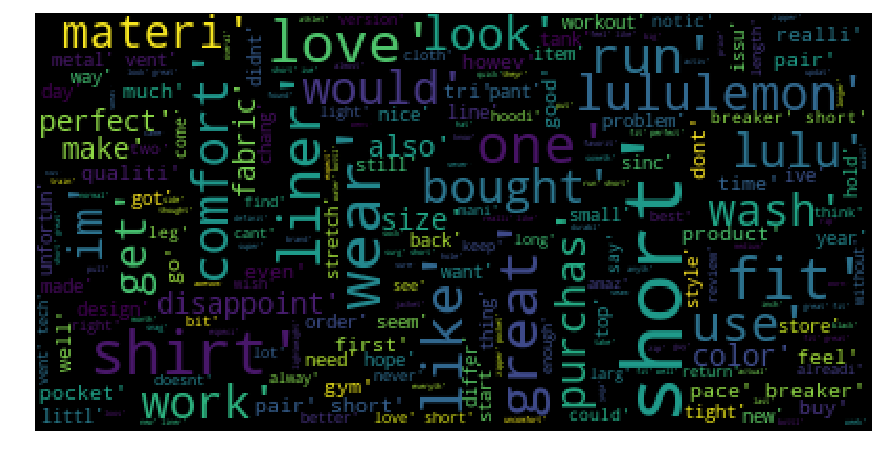

In [259]:
wc(positive_reviews['Review'])

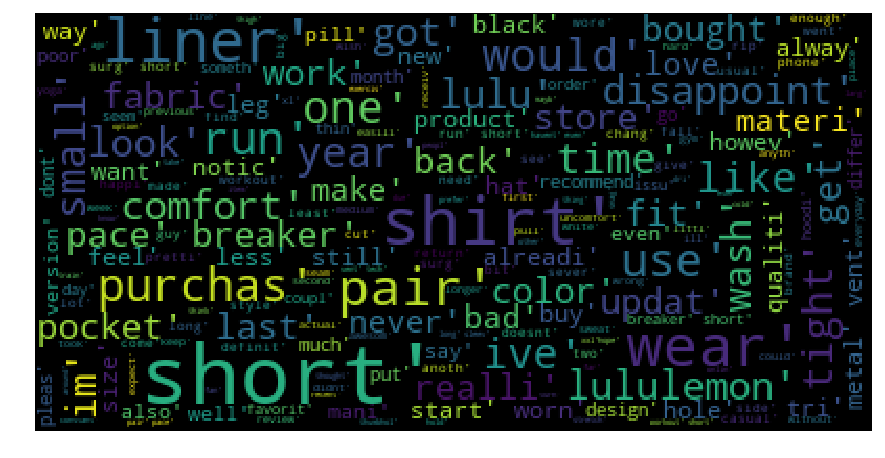

In [261]:
wc(negative_reviews['Review'])

In [195]:
import string

In [196]:
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [266]:
df_reviews['reviewText'].head(5).apply(text_process)

0    [comfortable, Tshirts, Wish, guys, would, make, colors, bring, back, old, style, 3, stitches, di...
1    [purchased, Short, Sleeve, expecting, like, ones, collection, held, fine, Unfortunately, three, ...
2    [bought, shirt, husband, run, Chicago, Marathon, Upon, starting, race, fit, great, 4, hours, swe...
3    [several, shirts, shorts, purchased, Lululemon, Hands, best, clothing, ever, worn, wear, Lulu, w...
4                                                                                      [Great, workouts]
Name: reviewText, dtype: object

In [219]:
rating_class = df_reviews[ (df_reviews['userRating'] == 1.0) | (df_reviews['userRating'] == 5.0) ]
X_review=rating_class['reviewText']
y=rating_class['userRating']

In [220]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [221]:
print(len(bow_transformer.vocabulary_))

5056


In [222]:
X_review = bow_transformer.transform(X_review)

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=42)

In [224]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [225]:
predict=nb.predict(X_test)

In [226]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[155  18]
 [ 21 259]]


             precision    recall  f1-score   support

        1.0       0.88      0.90      0.89       173
        5.0       0.94      0.93      0.93       280

avg / total       0.91      0.91      0.91       453



In [227]:
rating_positive=df['reviewText'][3]
rating_positive

"I have several shirts and shorts I have purchased from Lululemon. Hands down the best clothing I have ever worn. I wear Lulu to work (the ABC pant) and Lulu when I'm off."

In [228]:
rating_positive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_positive_transformed)[0]

5.0

In [229]:
rating_negative=df['reviewText'][1]
rating_negative

'I purchased this Short Sleeve expecting it to be just like all the other ones I have in my collection that have held up just fine. Unfortunately, after only three wears and one wash, which was washed to the guidelines lululemon provides, the material on the shirt looks like a 5 dollar t shirt, not a 68 dollar one. The material looks frayed and very distressed in certain parts and ultimately unwearable. Not sure if I just received a shirt that was in a bad batch, but I would definitely steer clear from this product until quality gets reworked. Very disappointed.'

In [230]:
rating_negative_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_negative_transformed)[0]

1.0

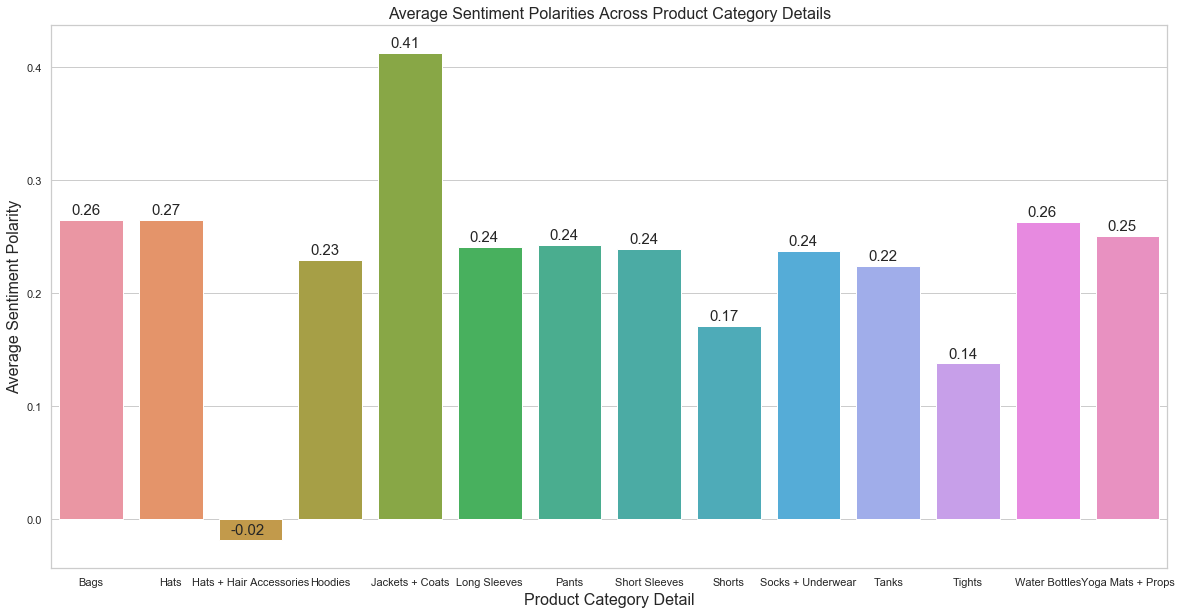

In [298]:
sent_means = df_reviews.groupby('productCategoryDetail').mean()['sentiment']

plt.figure(figsize = (20, 10))
ax = sns.barplot(x = sent_means.index, y = sent_means.values)
ax.set_ylim(sent_means.values.min() - 0.025,sent_means.values.max() + 0.025)

ax.set_title('Average Sentiment Polarities Across Product Category Details', fontsize = 16)
ax.set_ylabel('Average Sentiment Polarity', fontsize = 16)
ax.set_xlabel('Product Category Detail', fontsize = 16)

for p, label in zip(ax.patches, sent_means.values):
    ax.annotate(("%.2f" % round(label,2)), (p.get_x()+0.15, p.get_height()+0.005), fontsize = 15)

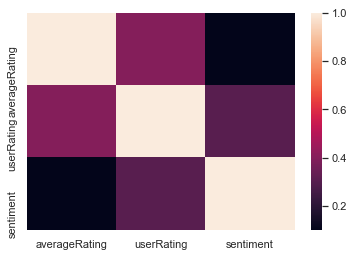

In [299]:
sns.heatmap(df_reviews[['averageRating', 'userRating','sentiment']].corr());

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


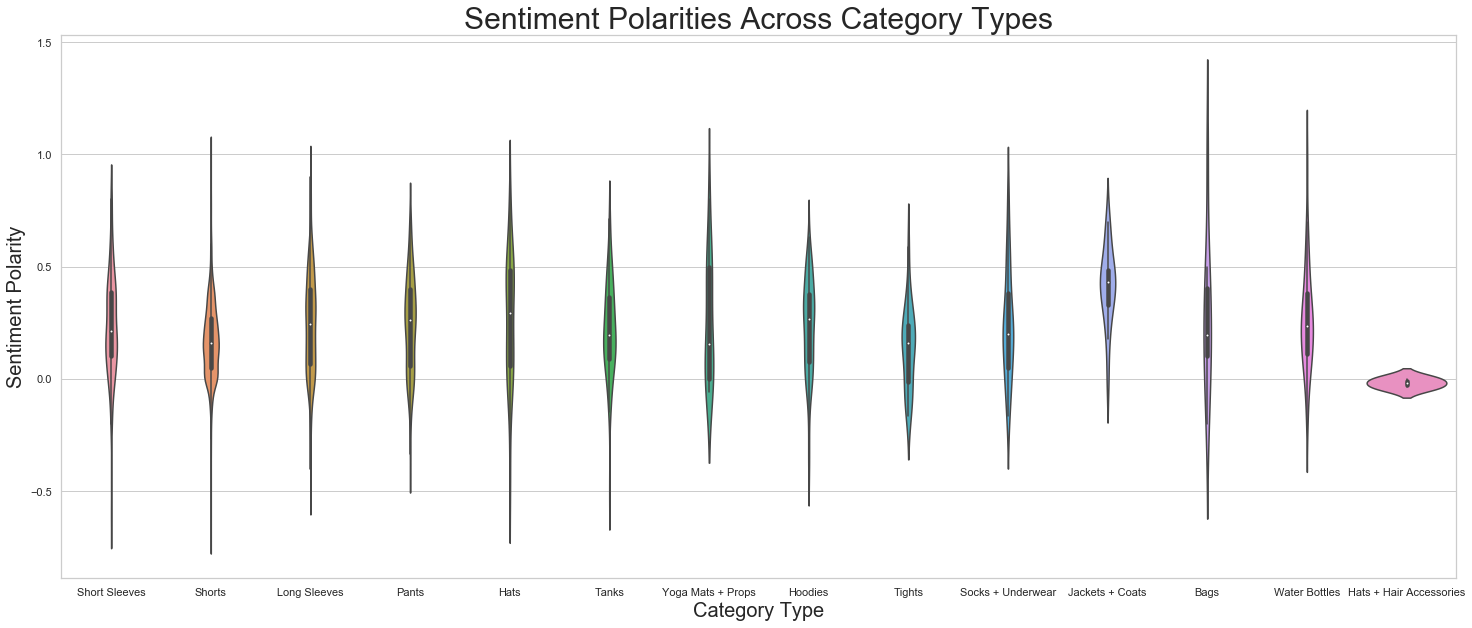

In [303]:
plt.figure(figsize=(25,10))
ax = sns.violinplot(data = df_reviews, x = 'productCategoryDetail', y='sentiment')

ax.set_title('Sentiment Polarities Across Category Types', fontsize = 30)
ax.set_ylabel('Sentiment Polarity', fontsize = 20)
ax.set_xlabel('Category Type', fontsize = 20);